<a href="https://colab.research.google.com/github/Rojan116/NepaliHandWrittenAlphabetRecognizer/blob/master/vowel_class_augmented_cnn_model_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Rojan116/NepaliHandWrittenAlphabetRecognizer.git

fatal: destination path 'NepaliHandWrittenAlphabetRecognizer' already exists and is not an empty directory.


In [2]:
ls

NepaliHandWrittenAlphabetRecognizer/  sample_data/


In [3]:
cd NepaliHandWrittenAlphabetRecognizer

/content/NepaliHandWrittenAlphabetRecognizer


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tqdm import tqdm
import random
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [0]:
PATH = os.getcwd()
DATADIR = PATH + '/nepalibarnasnew/Train'   
train_data_path = PATH + '/nepalibarnasnew/Train'
test_data_path = PATH + '/nepalibarnasnew/Test'


In [6]:
#counting categories
new_cat = []
for x in os.listdir(train_data_path):
  new_cat.append(x)

print(new_cat)  
classes = np.unique(new_cat)
print(len(classes))


['character-34-chyan', 'digits_4', 'character-12-tha', 'digits_9', 'character-32-sa', 'digits_6', 'vowel_7_e', 'character-05-n..a', 'vowel_0_a', 'character-22-pha', 'character-28-la', 'character-20-na', 'digits_7', 'character-03-ga', 'vowel_11_am', 'character-24-bha', 'character-29-wa', 'vowel_4_u', 'vowel_2_i', 'character-15-na', 'digits_8', 'character-08-ja', 'character-09-jha', 'character-30-sa', 'character-35-tra', 'character-17-tha', 'digits_5', 'character-10-yaa', 'character-26-ya', 'character-13-da', 'character-01-ka', 'vowel_5_uu', 'vowel_12_ah', 'character-16-ta', 'character-31-sa', 'character-11-ta', 'character-19-dha', 'character-36-gyan', 'character-04-gha', 'digits_1', 'vowel_10_au', 'character-02-kha', 'character-25-ma', 'character-06-cha', 'character-21-pa', 'character-33-ha', 'character-27-ra', 'vowel_8_ei', 'digits_0', 'digits_2', 'character-14-dha', 'vowel_6_re', 'character-18-da', 'vowel_9_o', 'character-07-chha', 'vowel_1_aa', 'vowel_3_ii', 'digits_3', 'character-23

In [0]:
CATEGORIES =[
"vowel_0_a","vowel_1_aa","vowel_2_i","vowel_3_ii","vowel_4_u",
"vowel_5_uu","vowel_6_re","vowel_7_e","vowel_8_ei","vowel_9_o","vowel_10_au","vowel_11_am","vowel_12_ah"
]

In [0]:
IMG_SIZE = 32
training_data = []
testing_data = []

def create_training_data():
  for catagory in CATEGORIES:
    path = os.path.join(train_data_path, catagory)
    class_num = CATEGORIES.index(catagory)
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          training_data.append([new_array,class_num])
        except Exception as e:
          pass



def create_testing_data():
  for catagory in CATEGORIES:
    path = os.path.join(test_data_path, catagory)
    class_num = CATEGORIES.index(catagory)
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          testing_data.append([new_array,class_num])
        except Exception as e:
          pass



create_training_data()
create_testing_data()


In [97]:
#shuffle training data for trainning diff image set in every batch
random.shuffle(training_data)

#hot encode image dataset

train_x = []
train_y = []
test_x = []
test_y = []



#seperating features and labels from list
for features, labels in training_data:
	train_x.append(features)
	train_y.append(labels)

for features, labels in testing_data:
	test_x.append(features)
	test_y.append(labels)


#converting list to array
train_y_array = np.array(train_y)
test_y_array = np.array(test_y)

#converting image dataset to input 32*32 dataset 

train_image_array = np.array(train_x).reshape(-1,32,32,1)
test_image_array = np.array(test_x).reshape(-1,32,32,1)

#counting total number of class in dataset
classes = np.unique(test_y_array)
print(classes)
print("total number of class={} ".format(len(classes)))



[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
total number of class=13 


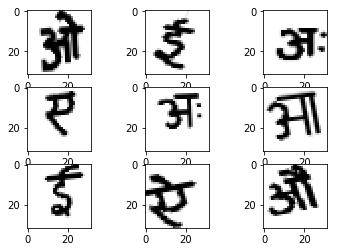

In [98]:
# convert from int to float
x_train = train_image_array.astype('float32')
x_test = test_image_array.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                              zoom_range=0.2
                            )
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, train_y, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(32, 32), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [0]:

#one hot enoded class 
train_y = to_categorical(train_y_array)
test_y = to_categorical(test_y_array)


train_y = np.array(train_y)
test_y = np.array(test_y)

#all train x, y and test x y are in array form now


In [0]:
#new model

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(13, activation = "softmax"))

# Define the optimizer
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = Adam(lr=0.0001)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

#model.summary()



In [103]:
history = model.fit(x=train_image_array,y=train_y,epochs=50,batch_size=100, validation_split=0.3)

Train on 1229 samples, validate on 527 samples
Epoch 1/50
1229/1229 [==============================] - 1s 897us/step - loss: 14.6920 - acc: 0.0708 - val_loss: 14.0270 - val_acc: 0.0797
Epoch 2/50
1229/1229 [==============================] - 0s 162us/step - loss: 14.6797 - acc: 0.0708 - val_loss: 14.2490 - val_acc: 0.0968
Epoch 3/50
1229/1229 [==============================] - 0s 157us/step - loss: 14.5112 - acc: 0.0838 - val_loss: 13.9871 - val_acc: 0.0930
Epoch 4/50
1229/1229 [==============================] - 0s 160us/step - loss: 14.2756 - acc: 0.0960 - val_loss: 14.8215 - val_acc: 0.0797
Epoch 5/50
1229/1229 [==============================] - 0s 168us/step - loss: 14.0410 - acc: 0.1017 - val_loss: 11.3473 - val_acc: 0.1879
Epoch 6/50
1229/1229 [==============================] - 0s 159us/step - loss: 13.8523 - acc: 0.1050 - val_loss: 11.9489 - val_acc: 0.1689
Epoch 7/50
1229/1229 [==============================] - 0s 166us/step - loss: 13.7690 - acc: 0.1033 - val_loss: 11.0203 - val

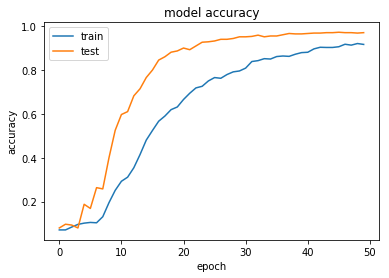

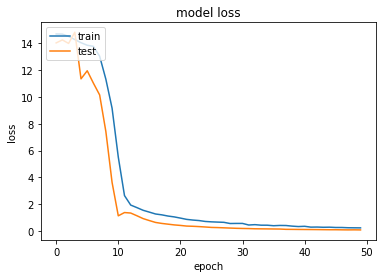

In [104]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
img = test_x[121].reshape(-1,32,32,1)
belongs_to_class = test_y[121]

In [121]:
print(img.shape)

(1, 32, 32, 1)


In [0]:
x = model.predict(img)

In [123]:
print(x)

[[1.7870740e-03 1.2057587e-03 1.0124632e-05 5.9761032e-06 2.4996578e-05
  6.4694773e-06 1.4251431e-04 2.7886228e-05 1.9096427e-05 1.9814006e-06
  2.9096509e-05 1.6670003e-04 9.9657226e-01]]


In [0]:
name = CATEGORIES[np.argmax(x)]
bc = CATEGORIES[np.argmax(belongs_to_class)]

predicted image is of: vowel_12_ah with accuracy 92.0
Actual class label is: vowel_12_ah


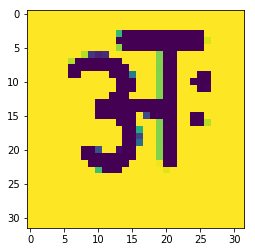

In [126]:
%matplotlib inline
imgplot = plt.imshow(test_x[121])
acc=np.amax(history.history['acc'])
acc= acc*100
acc = np.trunc(acc)

print("predicted image is of: {} with accuracy {}".format(name,acc))
print("Actual class label is: {}".format(bc))



In [0]:
y_predict = model.predict(test_image_array)

In [0]:
yPred = model.predict_classes(test_image_array)

In [129]:
yPred[1]

0

In [130]:
test_y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
newtest_y=np.argmax(test_y, axis=1)

In [132]:
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=newtest_y, y_pred=yPred))


Confusion matrix 
[[ 8  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10]]


In [0]:
#datagen.fit(x_train)

In [0]:
cm = confusion_matrix(newtest_y,yPred)

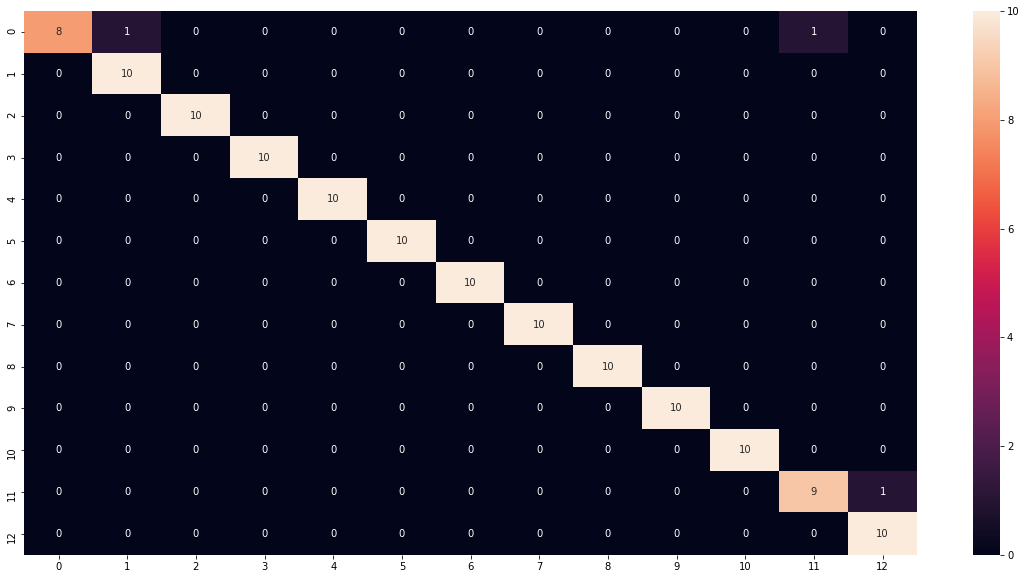

In [138]:
plt.figure(figsize= (20, 10))

sns.heatmap(cm, annot=True)